<a href="https://colab.research.google.com/github/DylanJJH/590/blob/master/A01_Jianhao_Ji.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
hitters=pd.read_csv('/content/Hitters.csv',index_col=0)
hitters=hitters.drop(columns=['League','Division','NewLeague'], axis=1)
hitters=hitters.dropna()
hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


In [2]:
# 1.1
X=hitters.drop(columns=['Salary'], axis=1).to_numpy()
Y=hitters['Salary'].to_numpy()
features=hitters.drop(columns=['Salary'], axis=1).columns.tolist()


In [3]:
from sklearn.linear_model import Lasso
alphas=10**np.linspace(-2,4,100)
coefs=[]

for alpha_i in alphas:
  model_lasso=Lasso(alpha=alpha_i, max_iter=5000, normalize=True).fit(X,Y)
  coefs.append(model_lasso.coef_)


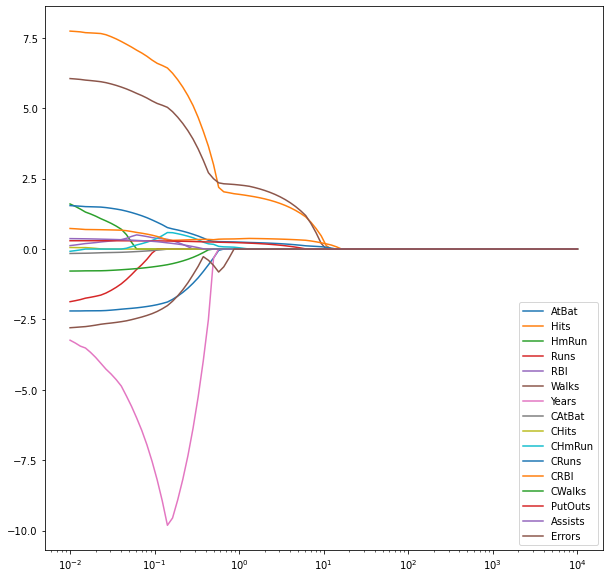

In [4]:
df_coefs=pd.DataFrame(coefs)
df_coefs.index=alphas
df_coefs.columns=features
df_coefs.plot(logx=True, figsize=[10,10])

Based on the coefficient project, we can tell that the optimal alpha is around 10.

In [5]:
Lasso_optimal=Lasso(alpha=10, max_iter=5000, normalize=True).fit(X,Y)
coef_optimal=pd.Series(Lasso_optimal.coef_, index=features)
coef_optimal

AtBat      0.000000
Hits       0.329475
HmRun      0.000000
Runs       0.000000
RBI        0.000000
Walks      0.000000
Years      0.000000
CAtBat     0.000000
CHits      0.000000
CHmRun     0.000000
CRuns      0.076322
CRBI       0.204475
CWalks     0.000000
PutOuts    0.000000
Assists    0.000000
Errors     0.000000
dtype: float64

For the optimal model, Hits, Cruns, and CRBI left.

In [6]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5, max_iter=5000, normalize=True).fit(X,Y)
lassocv.alpha_

0.13691039485958048

In [7]:
coef_cv=pd.Series(lassocv.coef_, index=features)
coef_cv

AtBat     -1.895082
Hits       6.455555
HmRun     -0.000000
Runs      -0.000000
RBI        0.349806
Walks      5.053509
Years     -9.587424
CAtBat    -0.008710
CHits      0.000000
CHmRun     0.557524
CRuns      0.789045
CRBI       0.337133
CWalks    -0.564136
PutOuts    0.285458
Assists    0.225658
Errors    -2.039256
dtype: float64

For lasso cross validation, the best optimal alpha is 0.13691039485958048. There are 13 predictors in the model.

In [8]:
# 1.2
from sklearn.linear_model import Ridge
coefs = []

for alpha_i in alphas:
    model_ridge=Ridge(alpha=alpha_i,normalize=True).fit(X,Y)
    coefs.append(model_ridge.coef_)

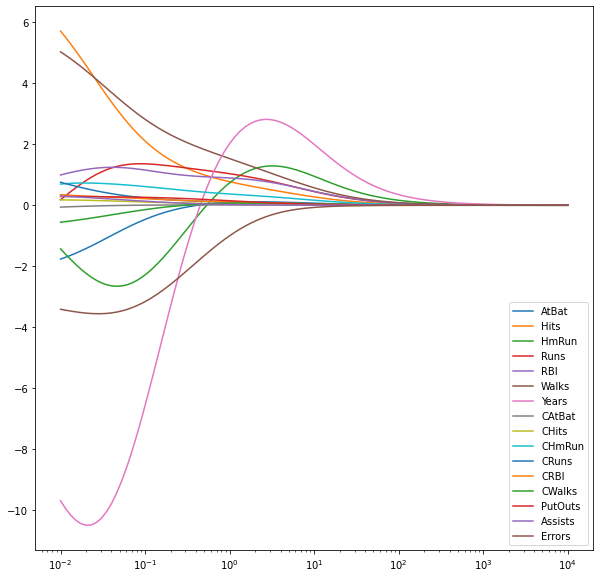

In [9]:
df_coefs=pd.DataFrame(coefs)
df_coefs.index=alphas
df_coefs.columns=features
df_coefs.plot(logx=True, figsize=[10,10])

In [10]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(alphas=alphas,normalize=True).fit(X,Y)
ridgecv.alpha_

0.011497569953977356

the optimal alpha is 0.011497569953977356

# 2
For the bias-variable tradeoff, if a model has a high accuracy, it would have a low error. In order to have a low bias, the model would try its best to fit the data. As a result, the model would have a high vairance, which might make the model less flexible and causes overfitting.

Regularization sets a potential error range toward model. In this way, it can help model avoid from overfitting. Also, in this process, we can remove some less effective variables.

From the above models, we find when the potential error range is very small, we would have many variables and some of them is very weak. It's because the model is trying its best to fit the data. In this case, the model is low bias but high variance.
When the potentila error range is increasing, the number of weak variables is decreasing. In the end, we get the effective variables in model. In this case, the model is less variance.